In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def first_visit_monte_carlo(env, gamma=0.99, episodes=5000):
    env = env.unwrapped
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    returns = defaultdict(list)
    policy = np.random.choice(n_actions, n_states)
    Q = np.zeros((n_states, n_actions))

    for _ in range(episodes):
        state = env.reset()[0]
        episode = []
        done = False

        while not done:
            action = np.random.choice(n_actions)
            next_state, reward, terminated, truncated, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state
            done = terminated or truncated

        G = 0
        visited = set()
        for state, action, reward in reversed(episode):
            G = gamma * G + reward
            if (state, action) not in visited:
                returns[(state, action)].append(G)
                Q[state, action] = np.mean(returns[(state, action)])
                policy[state] = np.argmax(Q[state])
                visited.add((state, action))

    return policy

def visualize_policy(policy, env):
    actions = ['←', '↓', '→', '↑']
    grid_size = int(np.sqrt(env.observation_space.n))
    policy_grid = np.array([actions[a] for a in policy]).reshape((grid_size, grid_size))

    print("Optimal Policy:")
    for row in policy_grid:
        print(" ".join(row))

    plt.figure(figsize=(5, 5))
    plt.table(cellText=policy_grid, cellLoc='center', loc='center', cellColours=[['w'] * grid_size] * grid_size)
    plt.axis('off')
    plt.show()






Optimal Policy:
↓ → ↓ ←
↓ ↓ ↓ →
→ → ↓ ←
← → → ↓


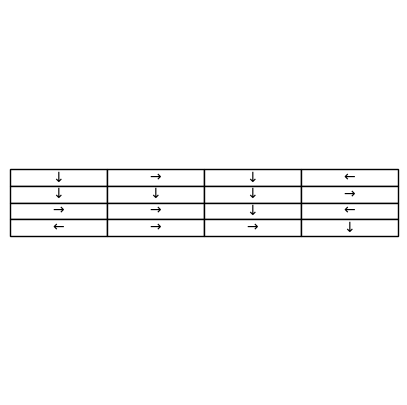

In [ ]:
env = gym.make("FrozenLake-v1", render_mode=None, is_slippery=False)
policy = first_visit_monte_carlo(env)
visualize_policy(policy, env)
env.close()